In [1]:
!pip install SciFiReaders
!pip install igor2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 4.2 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.1 MB/s eta 0:00:006.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.8 MB/s eta 0:00:006.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 6.1 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 8.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.0 MB/s eta 0:00:004 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.7 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: tornado
    Found existing installat

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import SciFiReaders
import glob
from scipy.optimize import curve_fit

You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.


In [6]:
path = "/content/"
os.chdir(path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/'

In [7]:
ibw_files = glob.glob(os.path.join(path, "*.ibw"))
ibw_files

[]

In [8]:
ibw_files = glob.glob(os.path.join(path, "*.ibw"))
ibw_files

[]

In [12]:
reader = SciFiReaders.IgorIBWReader(ibw_files[2])
data = reader.read()

{'Channel_000': sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: HeightRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,), 'Channel_001': sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: DeflectionRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,), 'Channel_002': sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: ZSensorRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,)}


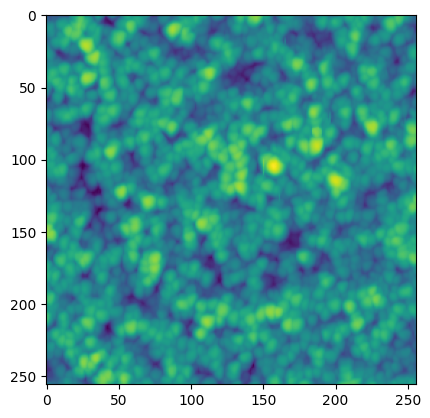

In [13]:
print(data)
height = data['Channel_000']
plt.imshow(height)

In [31]:
print(data['Channel_000'])

sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: HeightRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,)


In [59]:
height =  data['Channel_000']
height

sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: HeightRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,)

In [64]:
height[()].shape

(256, 256)

In [71]:
height = np.array(height)
height

array([[-4.4554127e-08, -4.7281304e-08, -4.9417309e-08, ...,
        -1.9927484e-08, -2.9984960e-08, -2.8960358e-08],
       [-3.4340587e-08, -3.9076497e-08, -4.5473229e-08, ...,
        -2.0368958e-08, -2.7279185e-08, -2.6842088e-08],
       [-2.9378413e-08, -3.4930991e-08, -4.1718664e-08, ...,
        -2.2377208e-08, -2.6665191e-08, -2.6292810e-08],
       ...,
       [-4.5462372e-08, -4.3242750e-08, -4.0471207e-08, ...,
         1.4592786e-08,  9.4980237e-09,  1.2805685e-09],
       [-3.8256871e-08, -3.5254942e-08, -3.2582790e-08, ...,
         1.7321383e-08,  1.1680129e-08,  3.1013201e-09],
       [-1.8704412e-08, -1.5380238e-08, -1.4073066e-08, ...,
         1.8502817e-08,  1.2394594e-08,  3.0323122e-09]], dtype=float32)

In [74]:
height.range

AttributeError: 'numpy.ndarray' object has no attribute 'range'

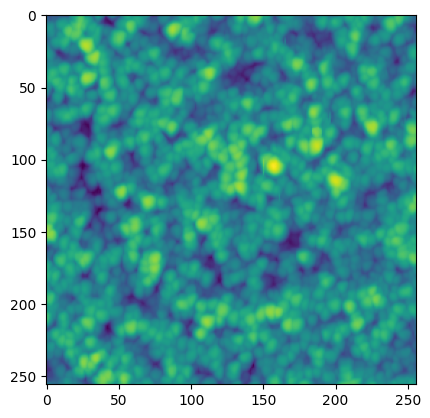

In [72]:
plt.imshow(height)

In [79]:
image = ((height - height.min()) / (height.max() - height.min()) * 255).astype('uint8') #normalize ibw for cv2

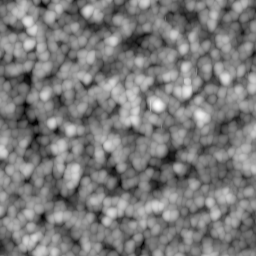

In [80]:
cv2_imshow(image)

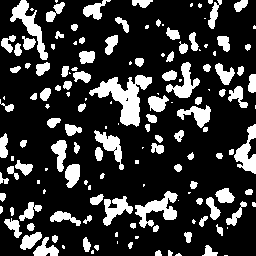

In [99]:
binary = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(binary)

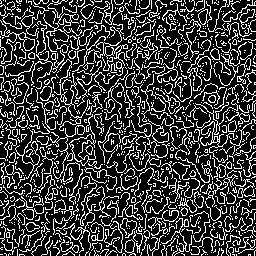

In [91]:
mask = cv.Canny(binary, 30, 50)
cv2_imshow(mask)